In [9]:
# Import Packages
import random
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Set itterations (10000 should remove all meaningful variance)
itterations = 10000

# Create empty dataframe
df = pd.DataFrame()

# Create range of rolls per turn to be tested
test_rolls = tuple(range(1, 16))

# Itterate over the numbers of rolls per turn to be tested 
for f in (test_rolls):
    
    # Reset average turns for each rolls per turn we test
    average_turns=0
    
    # Itterate over variable itterations (each itteration is a new simulated game)
    for i in range (itterations):
        
        # Reset turns and point_total for each game
        turns=0
        point_total=0
        
        # While loop continues play until the winning score is attained
        while point_total < 100:
        
            # Add a turn for each while loop trip and reset the point total for each turn at the start of the turn
            turns+=1
            point_total_turn=0
            
            # This itteration rolls the dice and runs until a pig is thrown or we reach our desired number of rolls per turn
            for t in range(f):
                roll=random.randint(1,6)
                if roll != 1:
                    point_total_turn +=roll
                else:
                    point_total_turn=0
                    break
                    
            # If a pig wasn't thrown then we add our total points per turn to the total points accumulated through the game so far        
            if point_total_turn > 0:
                point_total+=point_total_turn
            else:
                point_total + 0
            
        # Not actually the average turns but rather the total turns for that tested number of rolls
        # It needs to be divided by itterations to get the average    
        average_turns += turns
        
    # Created a dataframe of the average turns and each number of rolls tested			
    df = pd.concat([df, pd.DataFrame({'Rolls Per Turn': [f], 'Average Turns': [average_turns/itterations]})], ignore_index=True)

In [11]:
# Print dataframe
print(df)

    Rolls Per Turn  Average Turns
0                1        30.6417
1                2        18.6363
2                3        15.2012
3                4        13.8848
4                5        13.5870
5                6        13.9936
6                7        14.3957
7                8        15.8026
8                9        16.1639
9               10        18.4383
10              11        22.0275
11              12        23.9801
12              13        24.1915
13              14        26.4146
14              15        30.7560


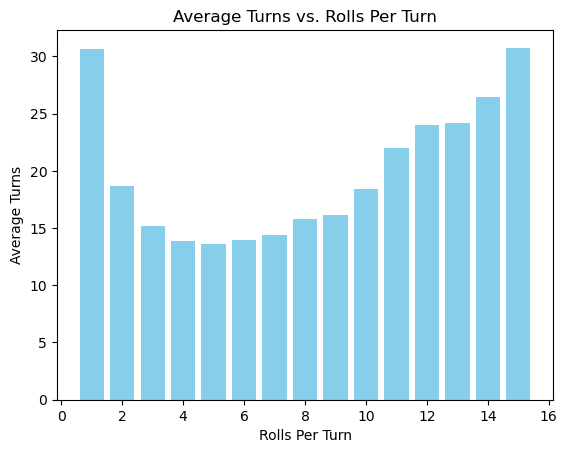

In [12]:
#Graph dataframe
plt.bar(df['Rolls Per Turn'], df['Average Turns'], color='skyblue')
plt.xlabel('Rolls Per Turn')
plt.ylabel('Average Turns')
plt.title('Average Turns vs. Rolls Per Turn')
plt.show()